Based on the above Exploratory Data Analysis, training a Linear Regression Model with trip_duration as the target variable

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install yellowbrick

In [3]:
def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)

  #looping for each variable
  for j,i in enumerate(var_group):

    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(x=data[i], shade=True)
    sns.lineplot(x=points, y=[0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('within 1 std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

In [4]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)

  #looping for each variable
  for j,i in enumerate(var_group):

    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1

      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

In [6]:
data = pd.read_csv('nyc_taxi_preprocessed.csv')
data.head()

,vendor_id,passenger_count,pickup_day,pickup_month,pickup_day_state,dropoff_day,dropoff_month,dropoff_day_state,store_and_fwd_flag,trip_duration,distance_travelled
0,Vendor2,1,Monday,February,Noon,Monday,February,Noon,N,400,1.199074
1,Vendor1,2,Friday,March,Night,Friday,March,Night,N,1100,4.129117
2,Vendor2,2,Sunday,February,Evening,Sunday,February,Evening,N,1635,7.250763
3,Vendor2,6,Tuesday,January,Morning,Tuesday,January,Morning,N,1141,2.361101
4,Vendor1,1,Wednesday,February,Early Morning,Wednesday,February,Early Morning,N,848,4.328540


In [7]:
data[data.select_dtypes(['object']).columns] = data.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [8]:
numeric_columns = data.select_dtypes(['number']).columns
categorical_columns = data.select_dtypes(['category']).columns

In [9]:
target_col = "trip_duration"
feature_cols = list(set(list(data.columns))-set(['trip_duration']))
X = data.loc[:,feature_cols]
y = data.loc[:,target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=42, test_size=0.25)

In [10]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((546991, 10), (546991,), (182331, 10), (182331,))

In [11]:
X_train.dtypes

vendor_id             category
passenger_count          int64
dropoff_day           category
store_and_fwd_flag    category
distance_travelled     float64
pickup_day            category
dropoff_month         category
pickup_month          category
dropoff_day_state     category
pickup_day_state      category
dtype: object

#### Creating two regression models for outliers and non outliers data

Separating outliers and non outliers and training individual regression models for it and validating whether the assumptions of Linear Regression Model hold.

In [12]:
X_train_merged = pd.concat([X_train,y_train],axis=1)

In [13]:
def find_outliers_IQR(df,with_df = X_train_merged):
   q1=with_df.quantile(0.25)
   q3=with_df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [14]:
def separate_outliers(X):
    outliers = find_outliers_IQR(X[numeric_columns])
    x_not_outliers = outliers[(outliers["passenger_count"].isnull()) & (outliers["trip_duration"].isnull()) & (outliers["distance_travelled"].isnull())]
    x_without_outliers = X[X.index.isin(x_not_outliers.index)]
    x_with_outliers = X[~X.index.isin(x_not_outliers.index)]
    return x_without_outliers,x_with_outliers

In [15]:
xy_train_without_outliers,xy_train_with_outliers = separate_outliers(X_train_merged)

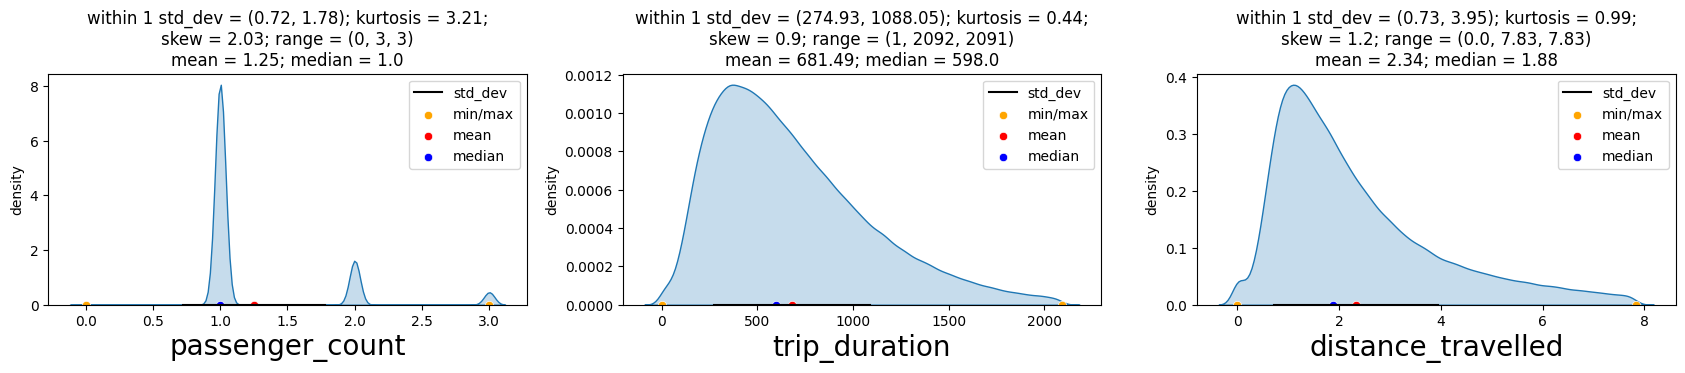

In [16]:
UVA_numeric(xy_train_without_outliers,numeric_columns)

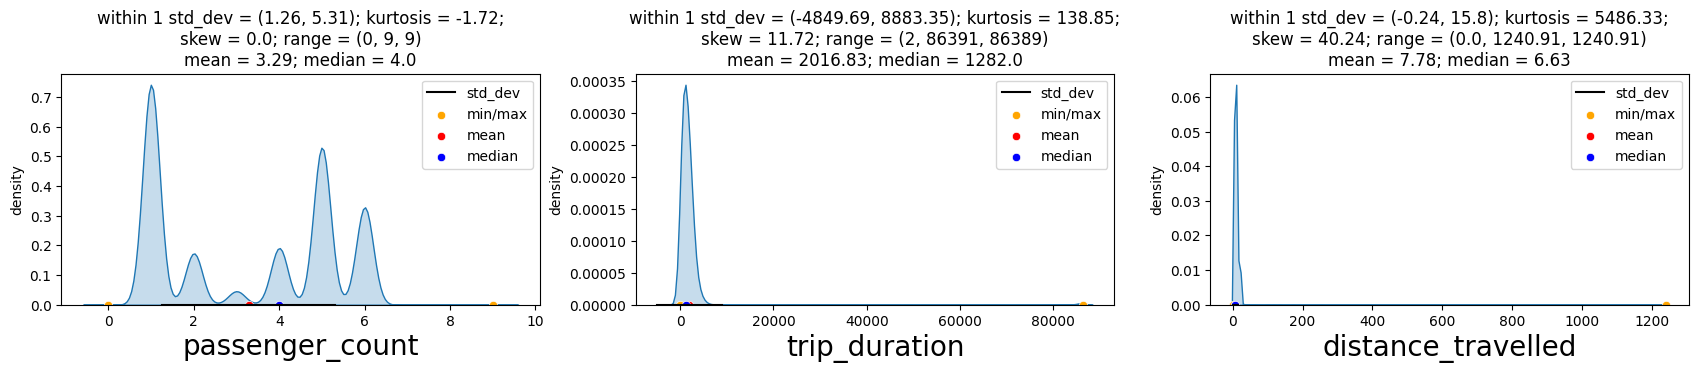

In [17]:
UVA_numeric(xy_train_with_outliers,numeric_columns)

From the above plots we observe that <b>trip_duration</b> and <b>distance_travelled</b> features are heavily skewed on the right side. We would apply the below transformations to reduce/remove skew.

- For right skewed data with positive values, apply Box Cox transformation
- For right skewed data with non negative values, apply Yeo Johnson transformation

Visualising box plot of numeric variables before transformation for train dataset

True
True
True


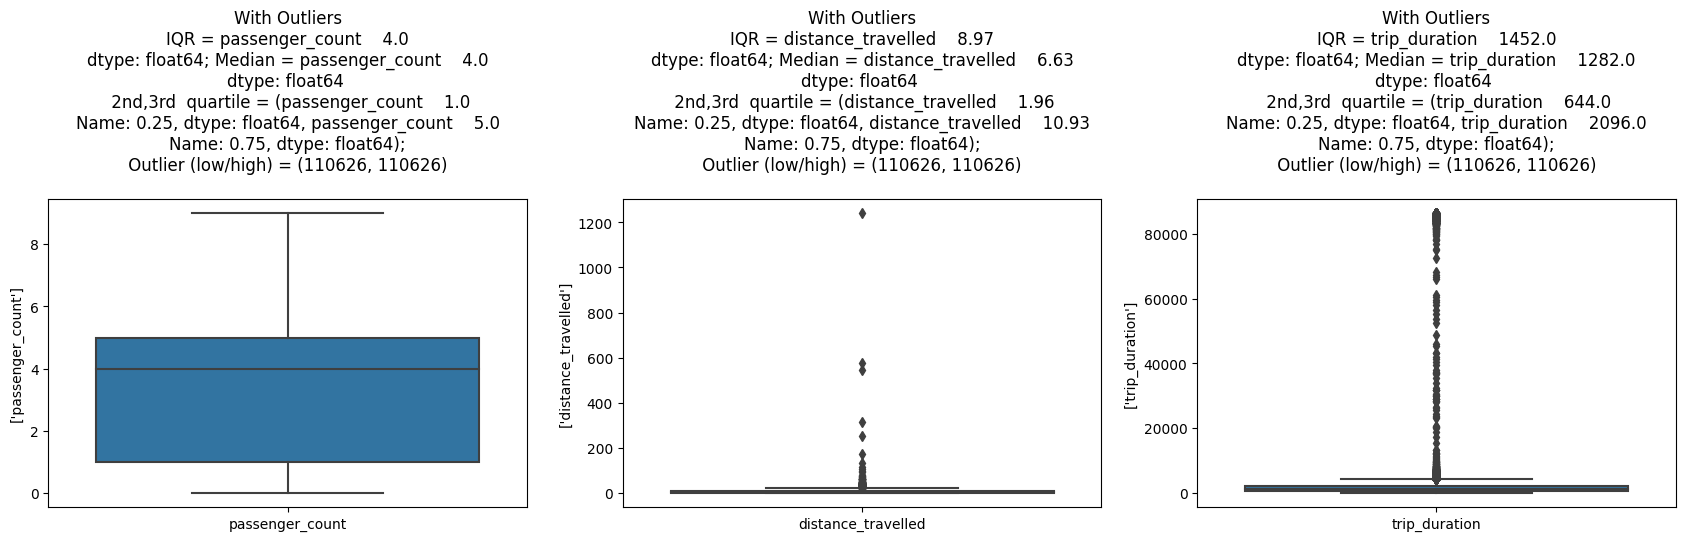

In [18]:
UVA_outlier(xy_train_with_outliers,[['passenger_count'],['distance_travelled'],['trip_duration']])

In [19]:
from scipy import stats
fitted_data, fitted_train_trip_dur_lambda = stats.boxcox(xy_train_with_outliers["trip_duration"])

In [20]:
xy_train_with_outliers["trip_duration"] = fitted_data

In [21]:
fitted_data, fitted_train_dist_lambda = stats.yeojohnson(xy_train_with_outliers["distance_travelled"])

In [22]:
xy_train_with_outliers["distance_travelled"] = fitted_data

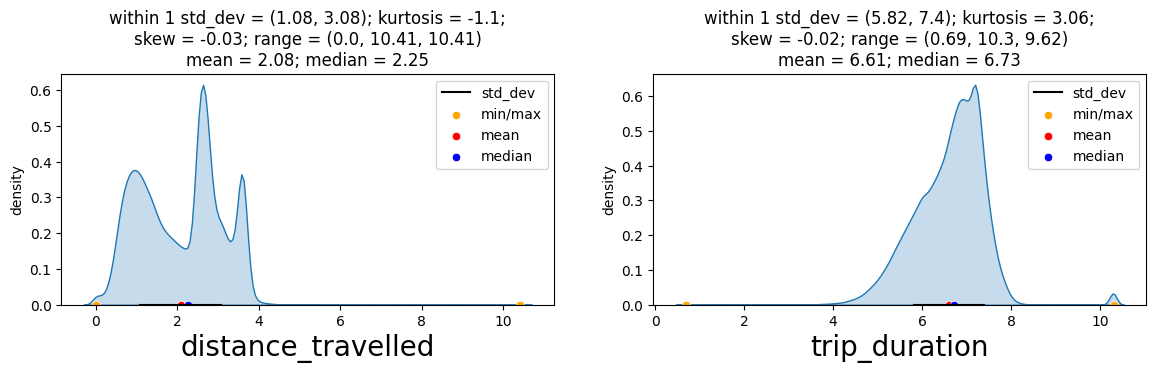

In [23]:
UVA_numeric(xy_train_with_outliers,["distance_travelled","trip_duration"])

Visualising box plot of numeric variables after transformation for train dataset

True
True
True


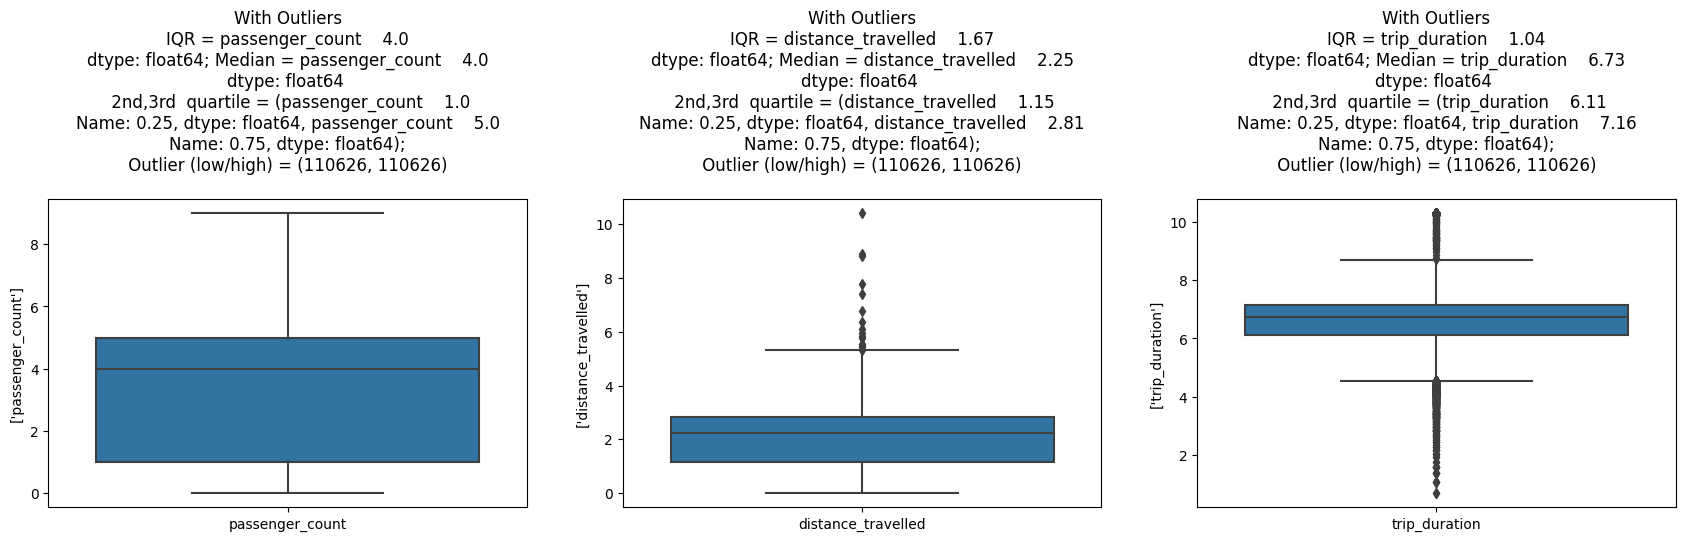

In [24]:
UVA_outlier(xy_train_with_outliers,[['passenger_count'],['distance_travelled'],['trip_duration']])

In [25]:
numeric_columns

Index(['passenger_count', 'trip_duration', 'distance_travelled'], dtype='object')

In [26]:
#data.to_csv('nyc_taxi_preprocessed.csv',index=False)

In [27]:
X_test_merged = pd.concat([X_test,y_test],axis=1)
xy_test_without_outliers,xy_test_with_outliers = separate_outliers(X_test_merged)

In [28]:
xy_test_without_outliers

,vendor_id,passenger_count,dropoff_day,store_and_fwd_flag,distance_travelled,pickup_day,dropoff_month,pickup_month,dropoff_day_state,pickup_day_state,trip_duration
469114,Vendor2,1,Saturday,N,2.283882,Saturday,May,May,Morning,Morning,657
356496,Vendor1,1,Saturday,N,1.188160,Saturday,June,June,Morning,Morning,398
645318,Vendor1,3,Sunday,N,4.311017,Sunday,April,April,Morning,Morning,682
498463,Vendor2,1,Saturday,N,3.173046,Saturday,June,June,Noon,Noon,758
296444,Vendor2,1,Wednesday,N,0.549240,Wednesday,February,February,Morning,Morning,197
...,...,...,...,...,...,...,...,...,...,...,...
227560,Vendor1,1,Tuesday,N,1.960446,Tuesday,May,May,Early Morning,Early Morning,440
218231,Vendor2,1,Wednesday,N,2.746683,Wednesday,February,February,Night,Night,607
458768,Vendor2,1,Thursday,N,2.191907,Thursday,June,June,Night,Night,443
194601,Vendor2,3,Sunday,N,5.027036,Sunday,May,May,Noon,Noon,1495


In [29]:
xy_test_with_outliers

,vendor_id,passenger_count,dropoff_day,store_and_fwd_flag,distance_travelled,pickup_day,dropoff_month,pickup_month,dropoff_day_state,pickup_day_state,trip_duration
694852,Vendor2,5,Friday,N,0.739164,Friday,January,January,Evening,Evening,195
696324,Vendor1,1,Sunday,N,9.018045,Sunday,May,May,Late Night,Late Night,840
191793,Vendor2,5,Friday,N,2.778744,Friday,February,February,Night,Night,873
142664,Vendor2,5,Sunday,N,10.094211,Sunday,January,January,Late Night,Late Night,1082
75223,Vendor2,2,Thursday,N,8.100711,Thursday,May,May,Early Morning,Early Morning,833
...,...,...,...,...,...,...,...,...,...,...,...
108220,Vendor1,4,Sunday,N,6.323011,Sunday,March,March,Morning,Morning,1198
367348,Vendor1,2,Friday,N,11.870570,Friday,March,March,Night,Night,2561
144139,Vendor2,1,Wednesday,N,8.752750,Wednesday,May,May,Late Night,Late Night,1550
583677,Vendor2,5,Wednesday,N,9.392242,Wednesday,March,March,Late Night,Late Night,953


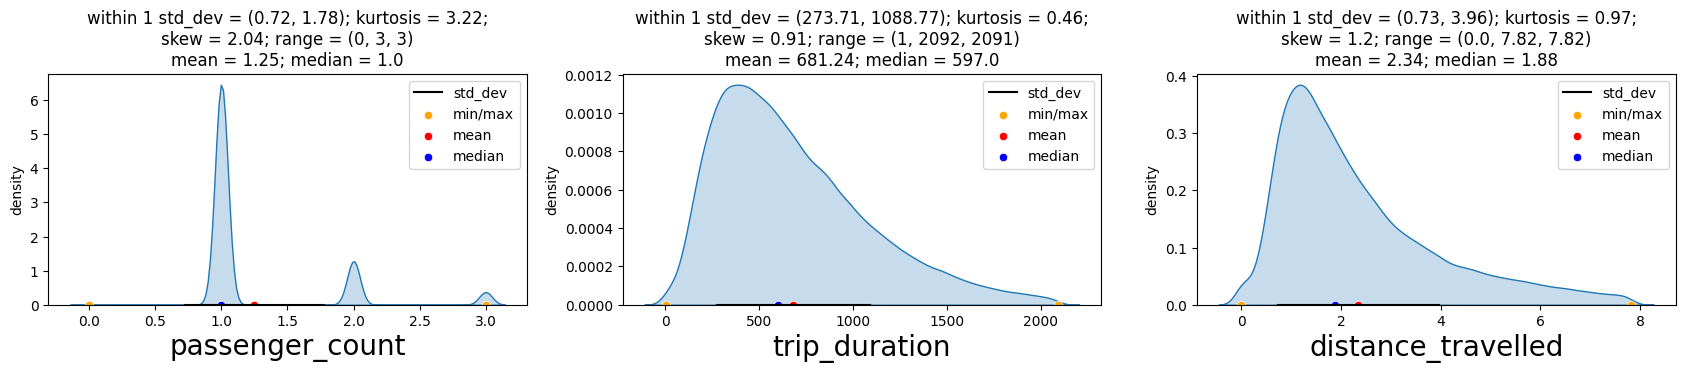

In [30]:
UVA_numeric(xy_test_without_outliers,numeric_columns)

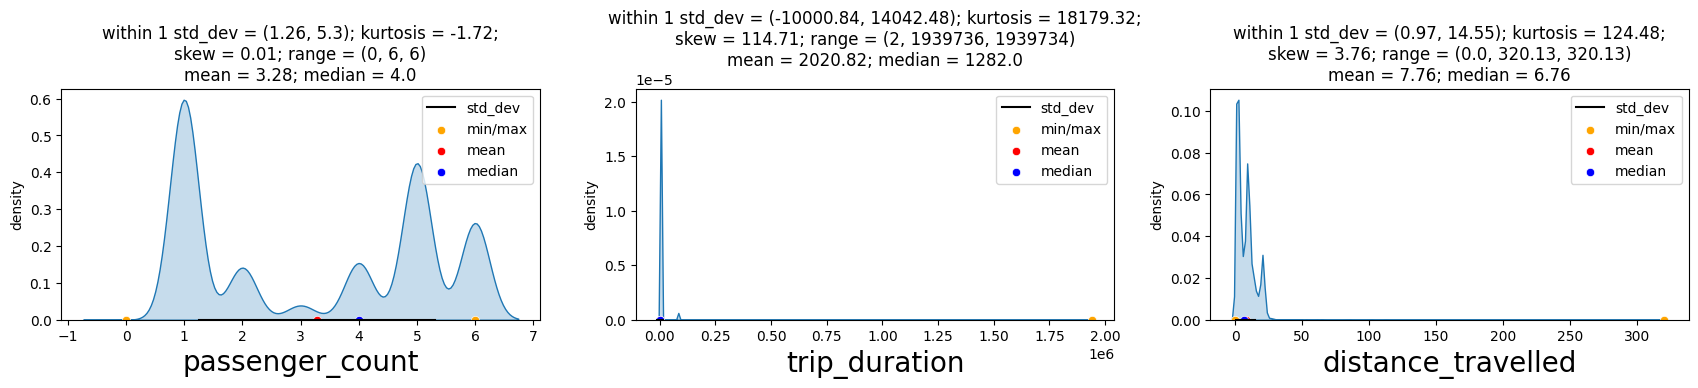

In [31]:
UVA_numeric(xy_test_with_outliers,numeric_columns)

Visualising box plot of numeric variables before transformation for test dataset

True
True
True


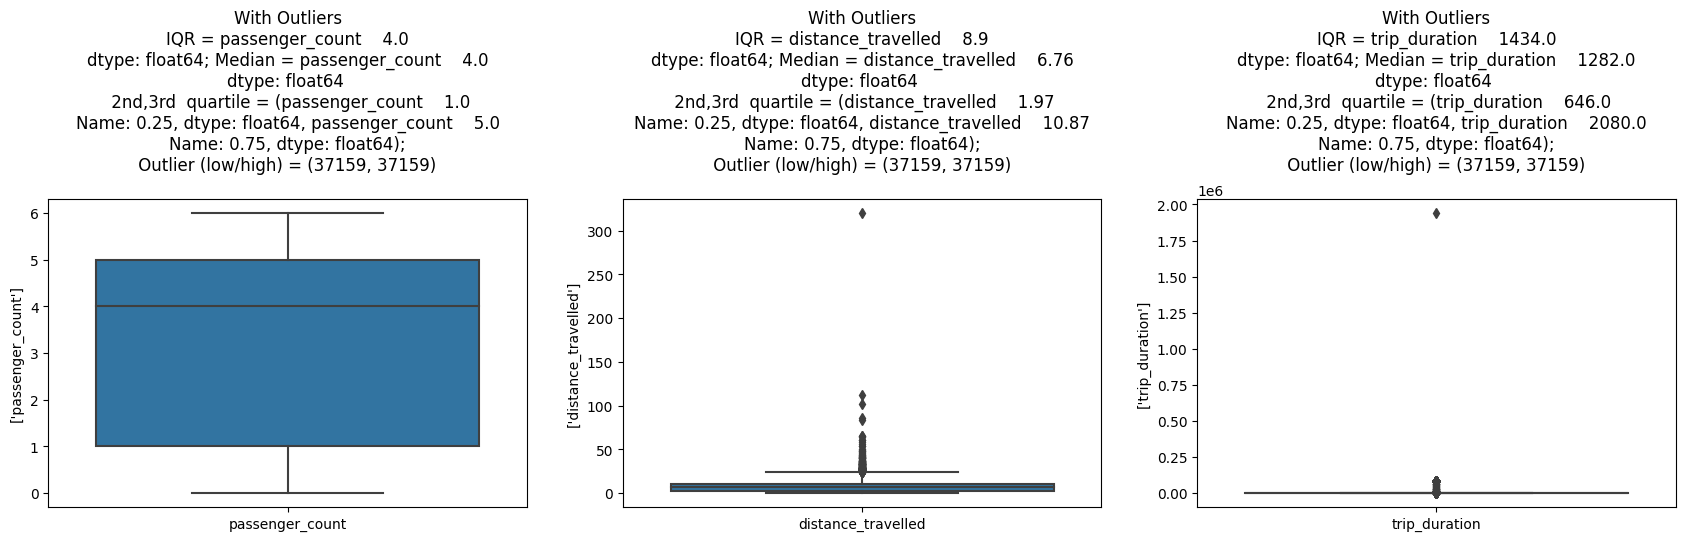

In [32]:
UVA_outlier(xy_test_with_outliers,[['passenger_count'],['distance_travelled'],['trip_duration']])

In [33]:
fitted_data = stats.boxcox(xy_test_with_outliers["trip_duration"],fitted_train_trip_dur_lambda)

In [34]:
xy_test_with_outliers["trip_duration"] = fitted_data

In [35]:
fitted_data = stats.yeojohnson(xy_test_with_outliers["distance_travelled"],fitted_train_dist_lambda)

In [36]:
xy_test_with_outliers["distance_travelled"] = fitted_data

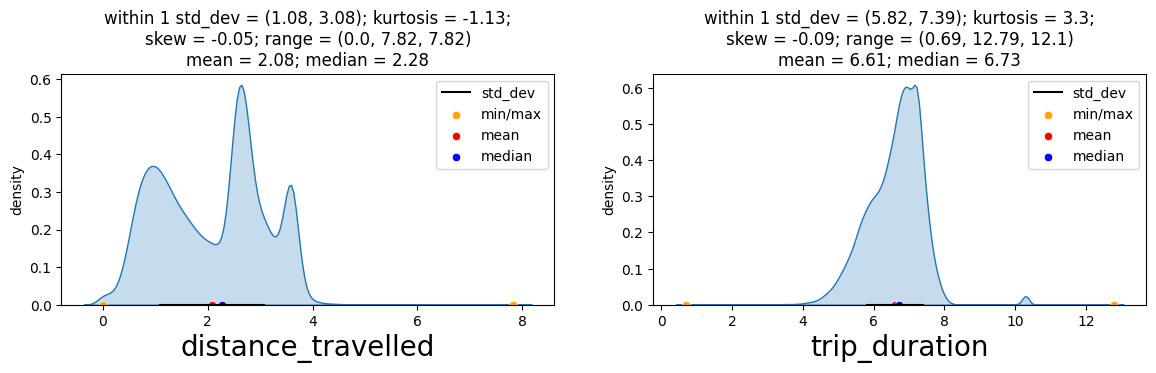

In [37]:
UVA_numeric(xy_test_with_outliers,["distance_travelled","trip_duration"])

Visualising box plot of numeric variables after transformation for test dataset

True
True
True


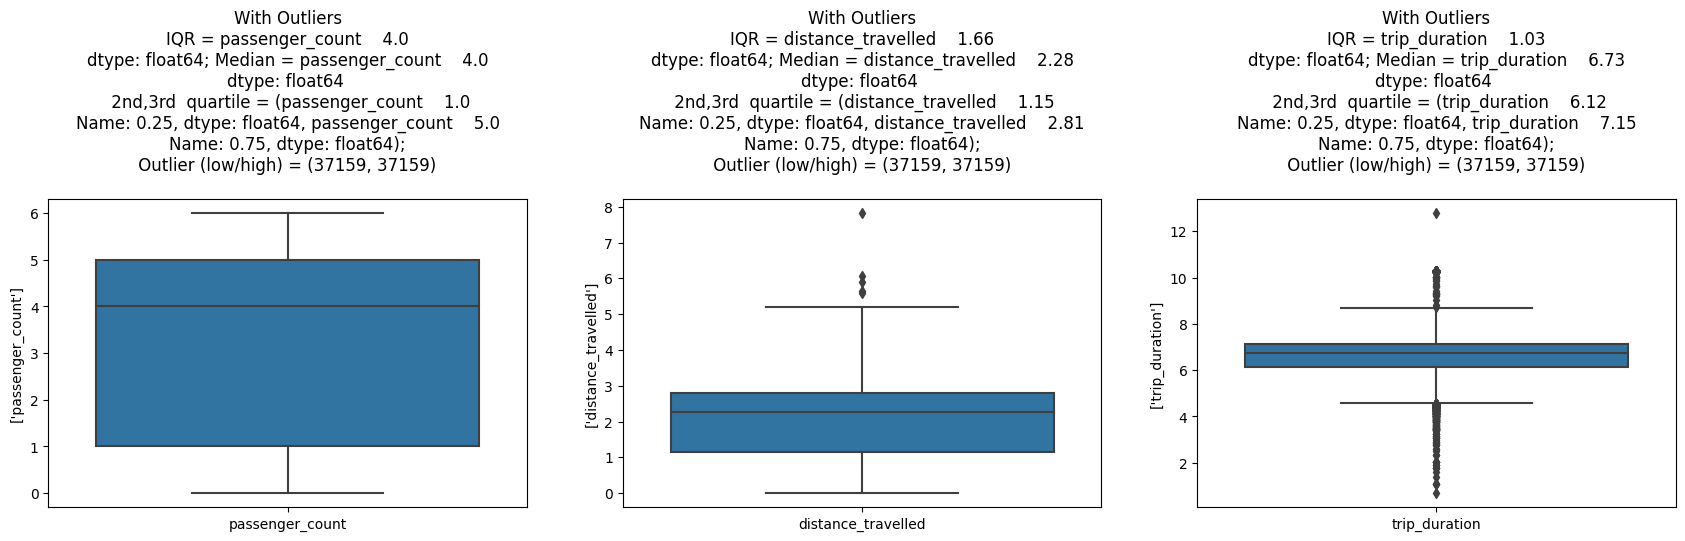

In [38]:
UVA_outlier(xy_test_with_outliers,[['passenger_count'],['distance_travelled'],['trip_duration']])

Visualizing relationship between independent variables with target variable through scatter plot for non outliers and outliers dataset

<Axes: xlabel='passenger_count', ylabel='distance_travelled'>

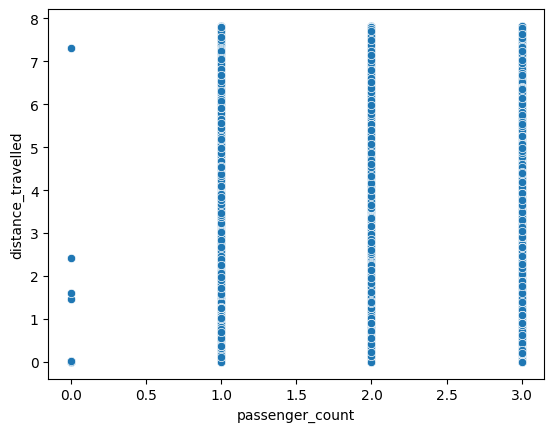

In [39]:
sns.scatterplot(x=xy_train_without_outliers['passenger_count'], y=xy_train_without_outliers['distance_travelled'])

<Axes: xlabel='passenger_count', ylabel='trip_duration'>

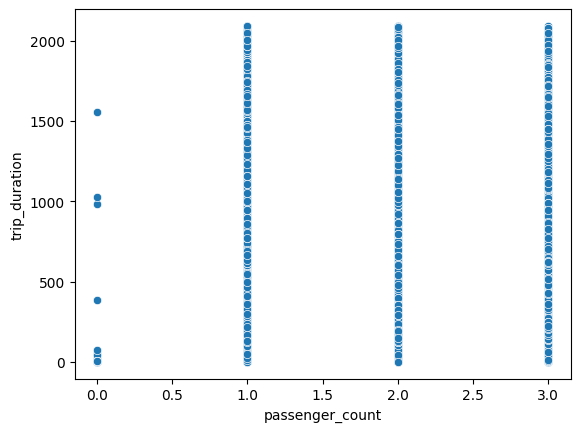

In [40]:
sns.scatterplot(x=xy_train_without_outliers['passenger_count'], y=xy_train_without_outliers['trip_duration'])

<Axes: xlabel='trip_duration', ylabel='distance_travelled'>

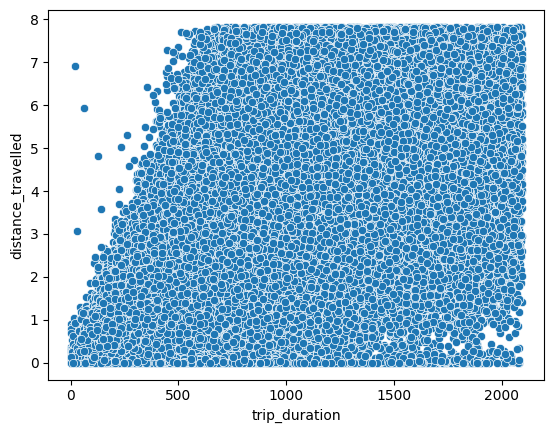

In [41]:
sns.scatterplot(x=xy_train_without_outliers['trip_duration'], y=xy_train_without_outliers['distance_travelled'])

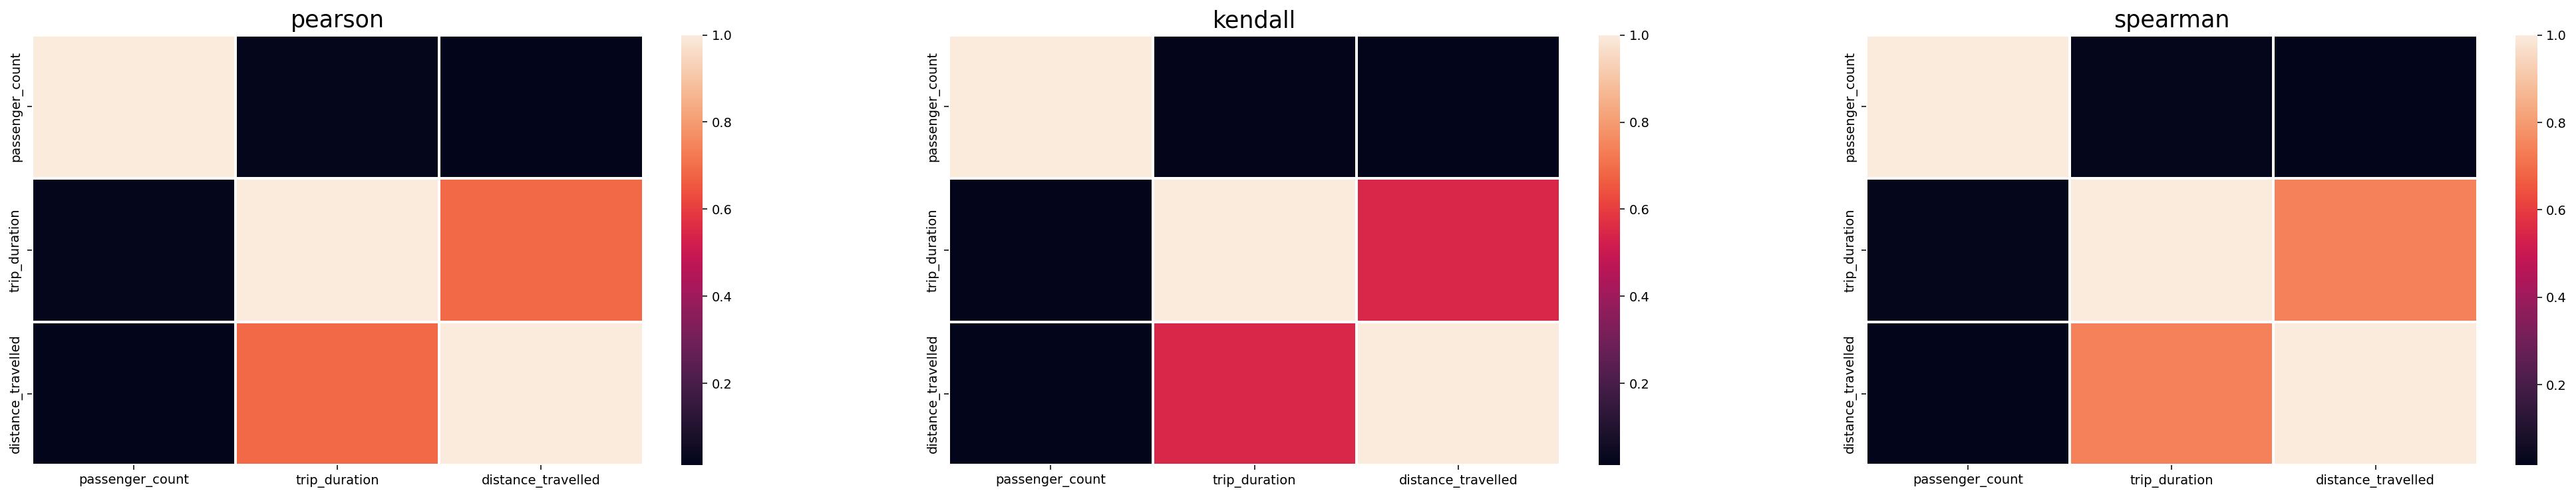

In [42]:
plt.figure(figsize=(36,6), dpi=140)
numerical = xy_train_without_outliers[numeric_columns]
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

<Axes: xlabel='passenger_count', ylabel='distance_travelled'>

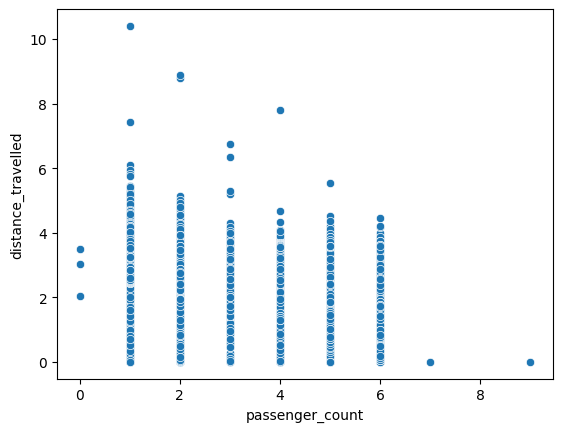

In [43]:
sns.scatterplot(x=xy_train_with_outliers['passenger_count'], y=xy_train_with_outliers['distance_travelled'])

<Axes: xlabel='passenger_count', ylabel='trip_duration'>

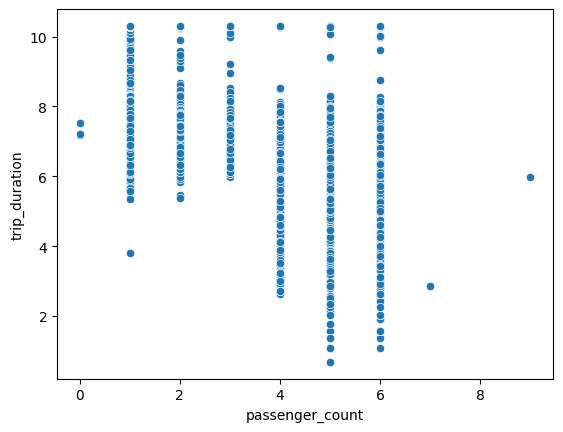

In [44]:
sns.scatterplot(x=xy_train_with_outliers['passenger_count'], y=xy_train_with_outliers['trip_duration'])

<Axes: xlabel='trip_duration', ylabel='distance_travelled'>

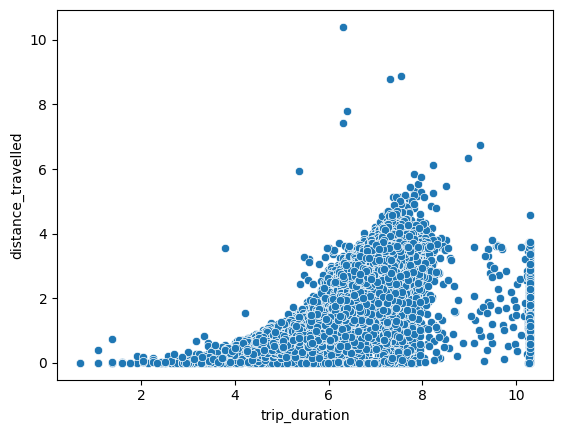

In [45]:
sns.scatterplot(x=xy_train_with_outliers['trip_duration'], y=xy_train_with_outliers['distance_travelled'])

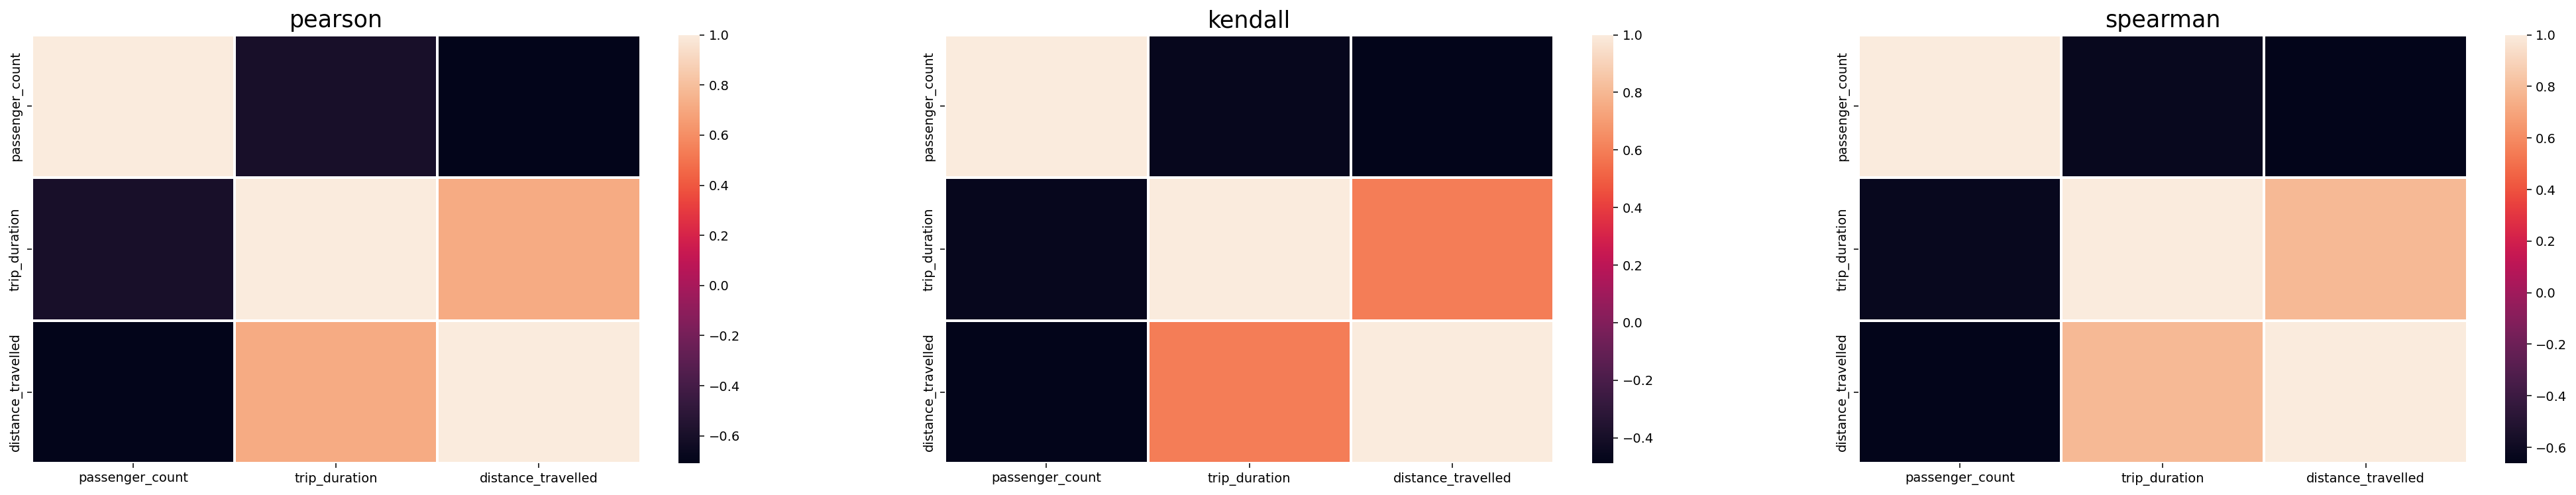

In [46]:
plt.figure(figsize=(36,6), dpi=140)
numerical = xy_train_with_outliers[numeric_columns]
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

Checking Variance Inflation Factor to detect Multi Collinearity between Independent Data Variables for non outliers and outliers dataset

In [47]:
def get_X_y(df):
    y = df.loc[:,'trip_duration']
    X = df.drop('trip_duration',axis=1)
    return X,y

In [48]:
X_without_outliers_train,y_without_outliers_train = get_X_y(xy_train_without_outliers)
X_with_outliers_train,y_with_outliers_train = get_X_y(xy_train_with_outliers)

For Categorical variables encoding, we will use CatBoost Algorithm from category_encoders library

In [49]:
!pip install category_encoders
import category_encoders as ce

In [50]:
from sklearn.preprocessing import StandardScaler
cbe_encoder = ce.cat_boost.CatBoostEncoder()
cbe_encoder.fit(X_without_outliers_train, y_without_outliers_train)
train_cbe = cbe_encoder.transform(X_without_outliers_train)
trans = StandardScaler()
data = trans.fit_transform(train_cbe)
# convert the array back to a dataframe
dataset = pd.DataFrame(data,columns=X_without_outliers_train.columns)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = dataset.columns
vif_data["VIF"] = [variance_inflation_factor(dataset.values, i)
                          for i in range(len(dataset.columns))]

print(vif_data)

              feature         VIF
0           vendor_id    1.014359
1     passenger_count    1.011395
2         dropoff_day  122.292521
3  store_and_fwd_flag    1.005147
4  distance_travelled    1.015217
5          pickup_day  122.413295
6       dropoff_month   98.970152
7        pickup_month   98.967248
8   dropoff_day_state    7.913912
9    pickup_day_state    7.932248


From the above, we observe that some features have high values of VIF indicating strong correlation among each other. Thus if we consider them in the model it will lead to high multi collinearity which violates the Linear Regression assumption. We will drop one of the features having VIF > 2.5 which is a conservative threshold and then compute the VIF for the remaining set of features

In [52]:
columns_to_be_excluded = ['dropoff_month','dropoff_day','dropoff_day_state']
dataset = dataset.drop(columns_to_be_excluded,axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = dataset.columns
vif_data["VIF"] = [variance_inflation_factor(dataset.values, i)
                          for i in range(len(dataset.columns))]

print(vif_data)

              feature       VIF
0           vendor_id  1.014352
1     passenger_count  1.010863
2  store_and_fwd_flag  1.005145
3  distance_travelled  1.013740
4          pickup_day  1.003041
5        pickup_month  1.000228
6    pickup_day_state  1.012238


From the above, we observe the VIF of all the features <= 2.5 and we can use them further for building the Linear Regression Model

In [53]:
cbe_encoder.fit(X_with_outliers_train, y_with_outliers_train)
train_cbe = cbe_encoder.transform(X_with_outliers_train)
trans = StandardScaler()
data = trans.fit_transform(train_cbe)
# convert the array back to a dataframe
dataset = pd.DataFrame(data,columns=X_with_outliers_train.columns)

In [54]:
vif_data = pd.DataFrame()
vif_data["feature"] = dataset.columns
vif_data["VIF"] = [variance_inflation_factor(dataset.values, i)
                          for i in range(len(dataset.columns))]

print(vif_data)

              feature        VIF
0           vendor_id   1.337281
1     passenger_count   2.333690
2         dropoff_day  24.952155
3  store_and_fwd_flag   1.018469
4  distance_travelled   2.026686
5          pickup_day  24.950741
6       dropoff_month  36.301430
7        pickup_month  36.297967
8   dropoff_day_state   3.181579
9    pickup_day_state   3.182169


From the above, we observe that some features have high values of VIF indicating strong correlation among each other. Thus if we consider them in the model it will lead to high multi collinearity which violates the Linear Regression assumption. We will drop one of the features having VIF > 2.5 which is a conservative threshold and then compute the VIF for the remaining set of features

In [55]:
columns_to_be_excluded = ['dropoff_month','dropoff_day','dropoff_day_state']
dataset = dataset.drop(columns_to_be_excluded,axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = dataset.columns
vif_data["VIF"] = [variance_inflation_factor(dataset.values, i)
                          for i in range(len(dataset.columns))]

print(vif_data)

              feature       VIF
0           vendor_id  1.337016
1     passenger_count  2.333150
2  store_and_fwd_flag  1.018450
3  distance_travelled  2.021048
4          pickup_day  1.006152
5        pickup_month  1.001951
6    pickup_day_state  1.004246


From the above, we observe the VIF of all the features <= 2.5 and we can use them further for building the Linear Regression Model

From the above we observe that columns `dropoff_month`, `dropoff_day` and `dropoff_day_state` can be dropped from training datasets for outliers and non outliers respectively to overcome the problem of multicollinearity which is one of the assumption when building a Linear Regression Model.

We will now build a sklearn pipeline with the selected features and apply transformations. Further the best parameters will be selected by using GridSearchCV for the non outliers and outliers training dataset

In [56]:
X_without_outliers_train_tmp = X_without_outliers_train.drop(['dropoff_month','dropoff_day','dropoff_day_state'],axis=1)

In [57]:
X_with_outliers_train_tmp = X_with_outliers_train.drop(['dropoff_month','dropoff_day','dropoff_day_state'],axis=1)

For Hyperparameter tuning, we will use Optuna library which uses Bayesian Optimization to evaluate the objective

In [58]:
!pip install optuna

Taking log of target variable `trip_duration` since it is a right skewed distribution

In [59]:
y_without_outliers_train_tmp = y_without_outliers_train.apply(lambda x: np.log10(x))

In [60]:
data = X_without_outliers_train_tmp
target = y_without_outliers_train_tmp

In [61]:
categorical_columns = list(X_without_outliers_train_tmp.select_dtypes(['category']).columns)
numeric_columns = list(X_without_outliers_train_tmp.select_dtypes(['number']).columns)

In [62]:
X_without_outliers_test,y_without_outliers_test = get_X_y(xy_test_without_outliers)
X_with_outliers_test,y_with_outliers_test = get_X_y(xy_test_with_outliers)

In [63]:
X_with_outliers_test_tmp = X_with_outliers_test.drop(['dropoff_month','dropoff_day','dropoff_day_state'],axis=1)

In [64]:
X_without_outliers_test_tmp = X_without_outliers_test.drop(['dropoff_month','dropoff_day','dropoff_day_state'],axis=1)

In [65]:
y_without_outliers_test_tmp = y_without_outliers_test.apply(lambda x: np.log10(x))

#### Hyperparameter Tuning for without outliers models through Optuna. The cell execution takes time hence commented

In [ ]:
"""
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
import joblib
import optuna

pipeline = Pipeline(steps=[
    ('cat_encode', ce.CatBoostEncoder()),
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('elasticnet', ElasticNet())
])

def objective(trial):
    poly__degree = trial.suggest_int('poly__degree', 1, 3, step=1)
    elasticnet__alpha = trial.suggest_loguniform("elasticnet__alpha", 1e-5, 100)
    elasticnet__l1_ratio = trial.suggest_float('elasticnet__l1_ratio', 0, 1, step=0.01)
    params = {
        'poly__degree': poly__degree,
        'elasticnet__alpha': elasticnet__alpha,
        'elasticnet__l1_ratio': elasticnet__l1_ratio
    }
    pipeline.set_params(**params)
    return -np.mean(cross_val_score(pipeline, X_without_outliers_train_tmp, y_without_outliers_train_tmp, cv=5, n_jobs=-1,scoring='neg_root_mean_squared_error'))


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)
"""

[I 2023-08-14 20:02:02,913] A new study created in memory with name: no-name-27c18596-1a20-4cb4-8fe6-9d48e99a3239
<ipython-input-69-afaf40eb0063>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  elasticnet__alpha = trial.suggest_loguniform("elasticnet__alpha", 1e-5, 100)
[I 2023-08-14 20:02:07,604] Trial 0 finished with value: 0.22488413742202482 and parameters: {'poly__degree': 1, 'elasticnet__alpha': 1.2757772584309478e-05, 'elasticnet__l1_ratio': 0.2}. Best is trial 0 with value: 0.22488413742202482.
[I 2023-08-14 20:02:23,879] Trial 1 finished with value: 0.20381055322441016 and parameters: {'poly__degree': 2, 'elasticnet__alpha': 0.0004073588913702799, 'elasticnet__l1_ratio': 0.9500000000000001}. Best is trial 1 with value: 0.20381055322441016.
[I 2023-08-14 20:02:35,916] Trial 2 finished with value: 0.3009867353009873 an

In [ ]:
"""
print('Best trial:', study.best_trial.params)
"""

Best trial: {'poly__degree': 3, 'elasticnet__alpha': 1.0010654949728926e-05, 'elasticnet__l1_ratio': 0.12}


The hyperparameters for the pipeline are obtained from above by tuning it on decreasing root mean square loss metric

In [66]:
from sklearn.linear_model import ElasticNet
import optuna
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
elastic_net = ElasticNet(alpha = 1.04465140941552e-05, l1_ratio = 0.1)
without_outliers_pipeline = Pipeline(steps=[
    ('cat_encode', ce.CatBoostEncoder()),
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree = 3)),
    ('elastic_net', elastic_net)
])

without_outliers_pipeline.fit(X_without_outliers_train_tmp, y_without_outliers_train_tmp)
y_without_outliers_test_pred = without_outliers_pipeline.predict(X_without_outliers_test_tmp)

#### Elastic Net Model For Without Outliers Prediction On Test And Train Set

In [67]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_without_outliers_test_tmp,y_without_outliers_test_pred,squared=False)

0.1984499887392083

In [68]:
y_without_outliers_train_pred = without_outliers_pipeline.predict(X_without_outliers_train_tmp)
mean_squared_error(y_without_outliers_train_tmp,y_without_outliers_train_pred,squared=False)

0.19814057070065766

In [69]:
import sklearn
train_r2 = sklearn.metrics.r2_score(y_without_outliers_train_tmp,y_without_outliers_train_pred)
train_r2

0.578934146967425

In [70]:
test_r2 = sklearn.metrics.r2_score(y_without_outliers_test_tmp,y_without_outliers_test_pred)
test_r2

0.5779513146164577

In [71]:
adj_train_r2 = (1 - (1 - train_r2) * ((X_without_outliers_train_tmp.shape[0] - 1) /
          (X_without_outliers_train_tmp.shape[0] - X_without_outliers_train_tmp.shape[1] - 1)))
adj_train_r2

0.5789273922666381

In [72]:
adj_test_r2 = (1 - (1 - test_r2) * ((X_without_outliers_test_tmp.shape[0] - 1) /
          (X_without_outliers_test_tmp.shape[0] - X_without_outliers_test_tmp.shape[1] - 1)))
adj_test_r2

0.5779309628708618

#### Check if residuals are normally distributed for without outlier model

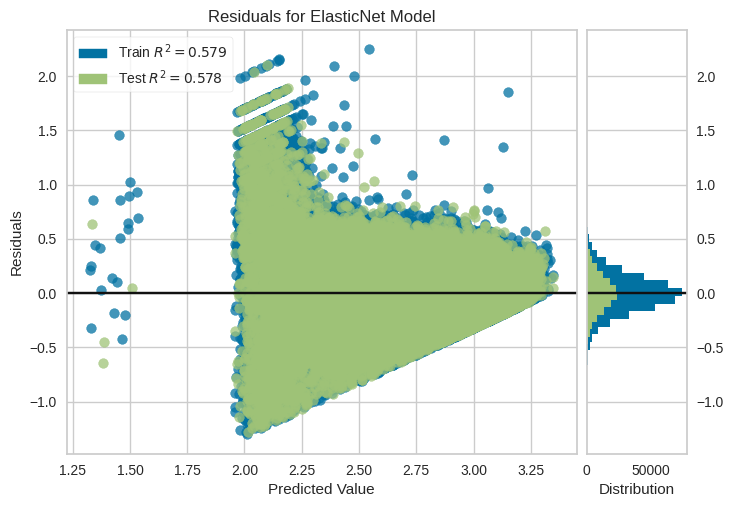

<Axes: title={'center': 'Residuals for ElasticNet Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [73]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(without_outliers_pipeline)
visualizer.fit(X_without_outliers_train_tmp, y_without_outliers_train_tmp)
visualizer.score(X_without_outliers_test_tmp, y_without_outliers_test_tmp)
visualizer.show()

The above plot shows that the residuals are normally distributed around 0. Thus we are able to validate the one of the assumptions of regression for the above trained model

#### Check Assumption for Mean Of Residuals

In [74]:
residuals = y_without_outliers_test_tmp-y_without_outliers_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.0005676317815365339


The mean of residuals is close to 0 which validates the assumption of regression

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

#### Check Assumption for Homoscedasticity

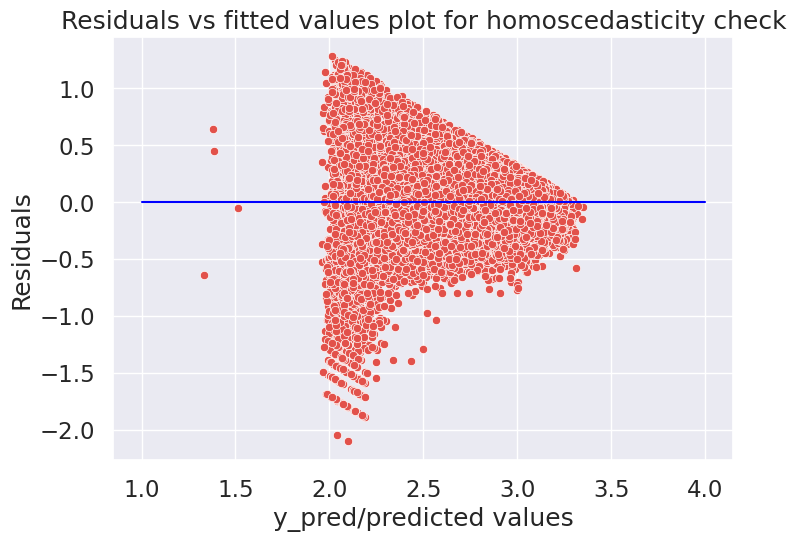

In [76]:
p = sns.scatterplot(x=y_without_outliers_test_pred,y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot(x =[1,4],y=[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

From the above plot, we observe that there is no definite pattern as the values are scattered around 0 line. Thus the above assumption is validated.

#### No Autocorrelation among Residuals

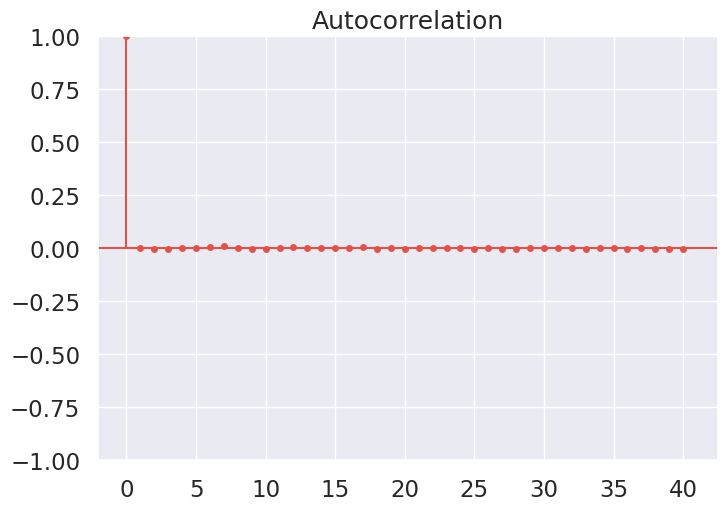

In [77]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

From the above plot we observe that the autocorrelation values are close to 0 thus the observations are not correlated with each other

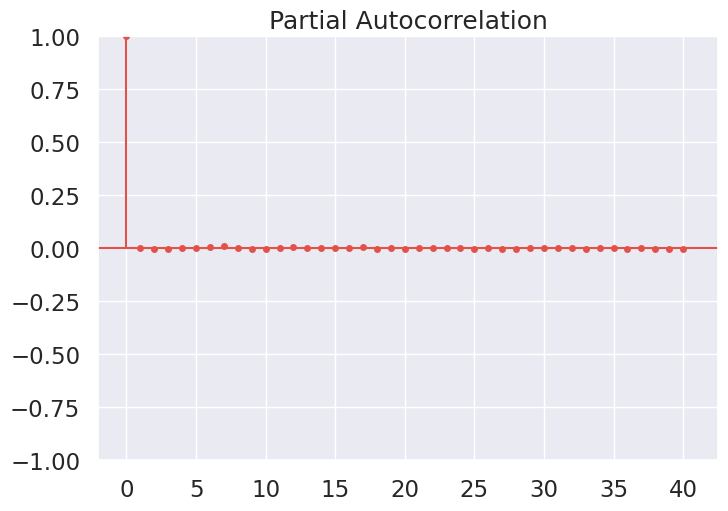

In [78]:
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

From the above partial autocorrelation plot we observe that the autocorrelation values are close to 0 thus the observations are not correlated with each other. Thus the above plots validate the assumption that there is no autocorrelation among the residuals.

#### No Perfect MultiCollinearity

The multicollinearity problem is resolved in the previous cells where we have calculated the Variance Inflation Factor for independent variables and overcome it.

In [79]:
data = X_with_outliers_train_tmp
target = y_with_outliers_train

In [80]:
categorical_columns = list(X_with_outliers_train_tmp.select_dtypes(['category']).columns)
numeric_columns = list(X_with_outliers_train_tmp.select_dtypes(['number']).columns)

#### Hyperparameter Tuning for with outliers models through Optuna. The cell execution takes time hence commented

In [ ]:
"""
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
import joblib
import optuna

pipeline = Pipeline(steps=[
    ('cat_encode', ce.CatBoostEncoder()),
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('elasticnet', ElasticNet())
])

def objective(trial):
    poly__degree = trial.suggest_int('poly__degree', 1, 3, step=1)
    elasticnet__alpha = trial.suggest_loguniform("elasticnet__alpha", 1e-5, 100)
    elasticnet__l1_ratio = trial.suggest_float('elasticnet__l1_ratio', 0, 1, step=0.01)
    params = {
        'poly__degree': poly__degree,
        'elasticnet__alpha': elasticnet__alpha,
        'elasticnet__l1_ratio': elasticnet__l1_ratio
    }
    pipeline.set_params(**params)
    return -np.mean(cross_val_score(pipeline, X_with_outliers_train_tmp, y_with_outliers_train, cv=5, n_jobs=-1,scoring='neg_mean_absolute_error'))


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)
"""

[I 2023-08-12 19:08:29,939] A new study created in memory with name: no-name-22e37556-8d53-4b7d-9e9e-dde3df283cc0
<ipython-input-65-0f40b35eeeb9>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  elasticnet__alpha = trial.suggest_loguniform("elasticnet__alpha", 1e-5, 100)
[I 2023-08-12 19:08:36,204] Trial 0 finished with value: 0.3409699370020787 and parameters: {'poly__degree': 1, 'elasticnet__alpha': 8.7151207987858e-05, 'elasticnet__l1_ratio': 0.9500000000000001}. Best is trial 0 with value: 0.3409699370020787.
[I 2023-08-12 19:08:37,734] Trial 1 finished with value: 0.3454470442031695 and parameters: {'poly__degree': 1, 'elasticnet__alpha': 0.06759003222061317, 'elasticnet__l1_ratio': 0.44}. Best is trial 0 with value: 0.3409699370020787.
[I 2023-08-12 19:08:43,089] Trial 2 finished with value: 0.3477571844621097 and parame

The hyperparameters for the pipeline are obtained from the above tuning procedure on decreasing mean absolute error since there are outliers present in the data

In [81]:
from sklearn.linear_model import ElasticNet
import optuna
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
elastic_net = ElasticNet(alpha = 0.0006728055781164352, l1_ratio = 0.13)
with_outliers_pipeline = Pipeline(steps=[
    ('cat_encode', ce.CatBoostEncoder()),
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree = 3)),
    ('elastic_net', elastic_net)
])

with_outliers_pipeline.fit(X_with_outliers_train_tmp, y_with_outliers_train)
y_with_outliers_test_pred = with_outliers_pipeline.predict(X_with_outliers_test_tmp)

#### Elastic Net Model For Outliers Prediction On Test and Train Set

In [82]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_with_outliers_test,y_with_outliers_test_pred)

0.2900642671199313

In [83]:
y_with_outliers_train_pred = with_outliers_pipeline.predict(X_with_outliers_train_tmp)
mean_absolute_error(y_with_outliers_train,y_with_outliers_train_pred)

0.2881400989630186

In [84]:
import sklearn
train_r2 = sklearn.metrics.r2_score(y_with_outliers_train,y_with_outliers_train_pred)
train_r2

0.6865232243004242

In [85]:
test_r2 = sklearn.metrics.r2_score(y_with_outliers_test,y_with_outliers_test_pred)
test_r2

0.6781407058139504

In [86]:
adj_train_r2 = (1 - (1 - train_r2) * ((X_with_outliers_train_tmp.shape[0] - 1) /
          (X_with_outliers_train_tmp.shape[0] - X_with_outliers_train_tmp.shape[1] - 1)))
adj_train_r2

0.6865033872266216

In [87]:
adj_test_r2 = (1 - (1 - test_r2) * ((X_with_outliers_test_tmp.shape[0] - 1) /
          (X_with_outliers_test_tmp.shape[0] - X_with_outliers_test_tmp.shape[1] - 1)))
adj_test_r2

0.6780800610114066

#### Check if residuals are normally distributed for with outlier model

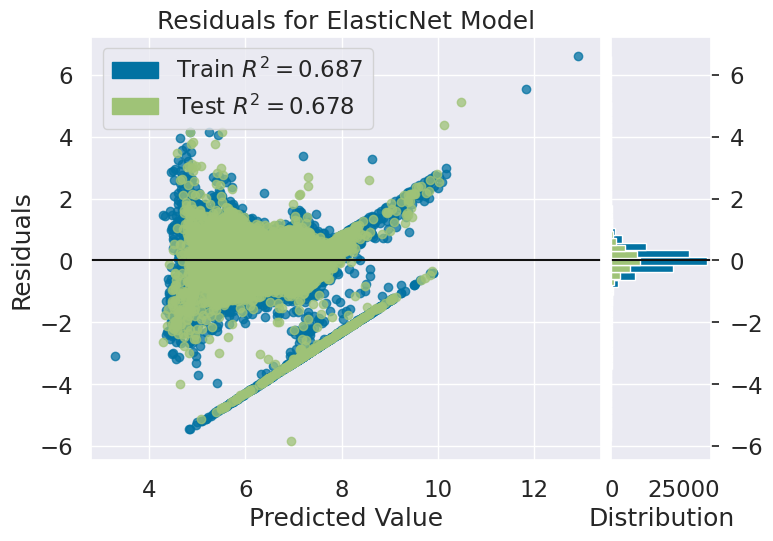

<Axes: title={'center': 'Residuals for ElasticNet Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [88]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(with_outliers_pipeline)
visualizer.fit(X_with_outliers_train_tmp, y_with_outliers_train)
visualizer.score(X_with_outliers_test_tmp, y_with_outliers_test)
visualizer.show()

The above plot shows that the residuals are normally distributed around 0. Thus we are able to validate the one of the assumptions of regression for the above trained model

#### Check Assumption for Mean Of Residuals

In [89]:
residuals = y_with_outliers_test-y_with_outliers_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.005733941306006834


The mean of residuals is close to 0 which validates the assumption of regression

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

#### Check Assumption for Homoscedasticity

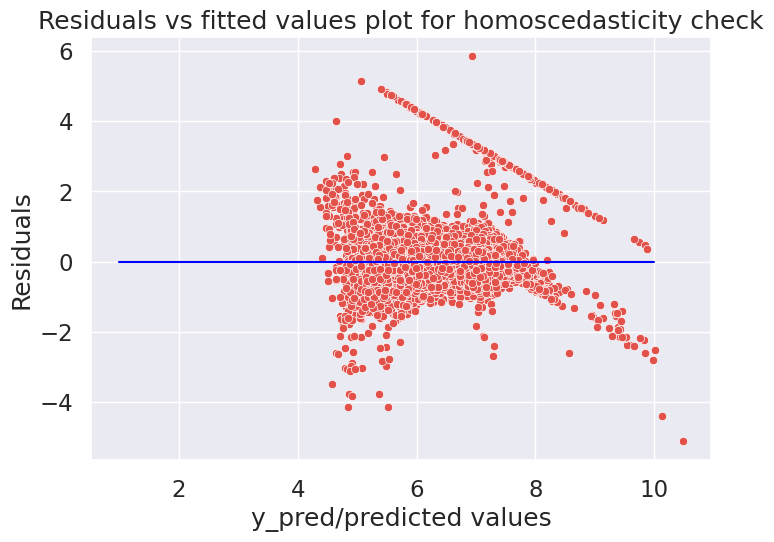

In [91]:
p = sns.scatterplot(x=y_with_outliers_test_pred,y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot(x =[1,10],y=[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

From the above plot, we observe that there is no definite pattern as the values are scattered around 0 line. Thus the above assumption is validated.

#### No Autocorrelation among Residuals

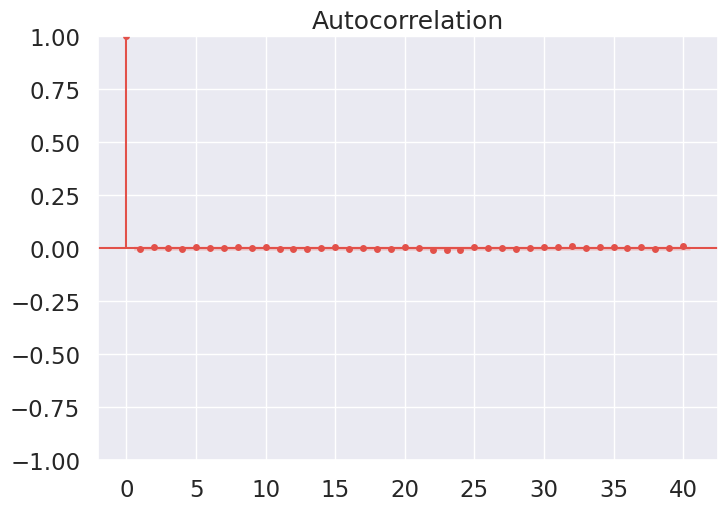

In [92]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

From the above plot we observe that the autocorrelation values are close to 0 thus the observations are not correlated with each other

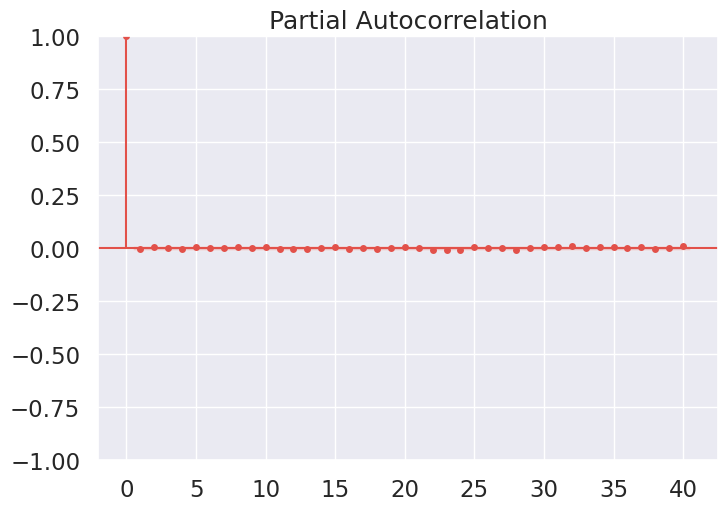

In [93]:
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

From the above partial autocorrelation plot we observe that the autocorrelation values are close to 0 thus the observations are not correlated with each other. Thus the above plots validate the assumption that there is no autocorrelation among the residuals.

#### No Perfect MultiCollinearity

The multicollinearity problem is resolved in the previous cells where we have calculated the Variance Inflation Factor for independent variables and overcome it.